In [4]:
# импортируем библиотеки numpy и pandas
import numpy as np
import pandas as pd
# импортируем функцию train_test_split(), с помощью
# которой разбиваем данные на обучающие и тестовые
from sklearn.model_selection import train_test_split
# импортируем библиотеку matplotlib
# для нашей функции plot_hist()
import matplotlib.pyplot as plt
%matplotlib inline
# импортируем модули norm и stats библиотеки scipy для
# построения гистограмм и графиков квантиль-квантиль
from scipy.stats import norm
from scipy import stats
# импортируем библиотеку seaborn для нашей 
# функции diagnostics_skewness()
import seaborn as sns
# импортируем класс PowerTransformer, позволяющий выполнить 
# преобразование Бокса-Кокса/Йео-Джонсона и стандартизацию,
# и функцию cross_val_score для нашей функции importance_auc()
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
# импортируем функцию roc_auc_score() для
# вычисления AUC-ROC
from sklearn.metrics import roc_auc_score
# импортируем класс LogisticRegression
from sklearn.linear_model import LogisticRegression
# импортируем классы BaseEstimator и TransformerMixin
from sklearn.base import BaseEstimator, TransformerMixin
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pygeohash as gh

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# 1) Загрузка данных.

# увеличиваем количество выводимых столбцов
pd.set_option('display.max_columns', 35)

data = pd.read_csv('flat_2.csv', sep=';')
data.head()

,Cart_Number,Rooms_Number,Object_Type,Object_Type_ID,Settlement,Settlement_ID,District,District_Id,Street,Street_Id,House_Number,Metro,Metro_ID,Metro_m,Flats_Plan,Flats_Plan_ID,Stor,Storeys,Wall,Wall_ID,Space_Total,Space_Living,Space_Kitchen,Value_abs,Value_m,Balcon_Num,Sost,Sost_ID,Clozet,Clozet_ID,lat,Long,Date_Create
0,10083994,1,Типовая,2,Новосибирск,1,Первомайский,8,Одоевского,1143,1/11,Речной вокзал,291,16760,Студия,23,4,18,Монолит,3,"22,00","12,00","0,00",1340000,"60909,091",0,Отличное,6,Совмещенный,8,"54,9371","83,1011",2014-04-21 11:24:39.767
1,10015724,1,Улучшенной планировки,3,Новосибирск,1,Дзержинский,1,Адриена Лежена,964,23,Золотая Нива,284,683,Изолированная,3,8,14,Кирпич,2,"42,70","22,00","11,80",3250000,"76112,412",0,Хорошее,2,Совмещенный,8,"55,0434","82,9822",2014-12-19 17:41:03.790
2,10014604,1,Типовая,2,Новосибирск,1,Дзержинский,1,Бориса Богаткова,349,243,Золотая Нива,284,366,NaN,0,6,9,Панель,1,"29,90","17,20","5,60",2150000,"71906,355",0,Удовлетворительное,7,Совмещенный,8,"55,0405","82,9801",2013-04-26 09:48:05.307
3,20094604,2,Типовая,2,Новосибирск,1,Советский,9,Лесосечная,980,4,Речной вокзал,291,21770,Изолированная,3,3,9,Панель,1,"46,30","28,50","7,10",2300000,"49676,026",1,NaN,0,Раздельный,9,"54,8902","83,0805",2017-07-26 12:16:17.380
4,30075897,3,Улучшенной планировки,3,Новосибирск,1,Октябрьский,7,Гаранина,495,25/2,Золотая Нива,284,1150,Изолированная,3,2,10,Панель,1,"66,00","42,00","9,00",2950000,"44696,97",0,Хорошее,2,Раздельный,9,"55,0288","82,9703",2016-06-06 15:35:46.470


In [4]:
# смотрим типы переменных и информацию о количестве пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34856 entries, 0 to 34855
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Cart_Number     34856 non-null  int64 
 1   Rooms_Number    34856 non-null  int64 
 2   Object_Type     34856 non-null  object
 3   Object_Type_ID  34856 non-null  int64 
 4   Settlement      34856 non-null  object
 5   Settlement_ID   34856 non-null  int64 
 6   District        34856 non-null  object
 7   District_Id     34856 non-null  int64 
 8   Street          34856 non-null  object
 9   Street_Id       34856 non-null  int64 
 10  House_Number    34839 non-null  object
 11  Metro           32952 non-null  object
 12  Metro_ID        34856 non-null  int64 
 13  Metro_m         34856 non-null  int64 
 14  Flats_Plan      26866 non-null  object
 15  Flats_Plan_ID   34856 non-null  int64 
 16  Stor            34856 non-null  int64 
 17  Storeys         34856 non-null  int64 
 18  Wall  

In [5]:
# смотрим еще по другому наличие пропусков
print(data.isnull().sum())

Cart_Number          0
Rooms_Number         0
Object_Type          0
Object_Type_ID       0
Settlement           0
Settlement_ID        0
District             0
District_Id          0
Street               0
Street_Id            0
House_Number        17
Metro             1904
Metro_ID             0
Metro_m              0
Flats_Plan        7990
Flats_Plan_ID        0
Stor                 0
Storeys              0
Wall               553
Wall_ID              0
Space_Total          0
Space_Living         0
Space_Kitchen        0
Value_abs            0
Value_m              0
Balcon_Num           0
Sost              1993
Sost_ID              0
Clozet            1943
Clozet_ID            0
lat                  0
Long                 0
Date_Create          0
dtype: int64


In [6]:
# смотрим статистики количественных переменных
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data.describe()

,Cart_Number,Rooms_Number,Object_Type_ID,Settlement_ID,District_Id,Street_Id,Metro_ID,Metro_m,Flats_Plan_ID,Stor,Storeys,Wall_ID,Value_abs,Balcon_Num,Sost_ID,Clozet_ID
count,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000,34856.000
mean,38852364.878,1.759,2.968,44.367,7.079,1866.086,272.121,5809.013,4.282,5.312,9.375,2.440,2503426.877,0.428,4.235,7.944
std,50624528.994,0.825,3.853,236.387,7.150,2314.029,65.507,16192.766,6.650,3.916,5.012,8.025,1252328.568,0.523,2.677,2.048
min,10386.000,1.000,1.000,1.000,1.000,6.000,0.000,0.000,0.000,1.000,0.000,0.000,610000.000,0.000,0.000,0.000
25%,10075344.750,1.000,2.000,1.000,4.000,615.000,283.000,811.000,1.000,2.000,5.000,1.000,1750000.000,0.000,2.000,8.000
50%,20057076.500,2.000,3.000,1.000,6.000,1093.000,290.000,3590.000,3.000,4.000,9.000,2.000,2280000.000,0.000,4.000,8.000
75%,30074515.750,2.000,3.000,1.000,7.000,1608.000,290.000,6870.000,3.000,7.000,10.000,2.000,2921250.000,1.000,6.000,9.000
max,300711468.000,4.000,44.000,1673.000,64.000,12819.000,294.000,2500000.000,43.000,27.000,28.000,95.000,24000000.000,4.000,11.000,11.000


In [7]:
# смотрим дублирующие наблюдения:
data[data.duplicated(keep=False)]

,Cart_Number,Rooms_Number,Object_Type,Object_Type_ID,Settlement,Settlement_ID,District,District_Id,Street,Street_Id,House_Number,Metro,Metro_ID,Metro_m,Flats_Plan,Flats_Plan_ID,Stor,Storeys,Wall,Wall_ID,Space_Total,Space_Living,Space_Kitchen,Value_abs,Value_m,Balcon_Num,Sost,Sost_ID,Clozet,Clozet_ID,lat,Long,Date_Create


## Видим что сейчас дублирующих значений сейчас вроде нет

# 2) Удаление бесполезных переменных.

In [8]:
# удалим все переменные ID-переменные.
# лучше будем обрабатывать категориальные переменные сами

data.drop(['Object_Type_ID','Settlement_ID','District_Id','Street_Id', 
           'Metro_ID','Flats_Plan_ID','Wall_ID','Sost_ID','Clozet_ID'],axis=1, inplace=True)
data.columns

Index(['Cart_Number', 'Rooms_Number', 'Object_Type', 'Settlement', 'District',
       'Street', 'House_Number', 'Metro', 'Metro_m', 'Flats_Plan', 'Stor',
       'Storeys', 'Wall', 'Space_Total', 'Space_Living', 'Space_Kitchen',
       'Value_abs', 'Value_m', 'Balcon_Num', 'Sost', 'Clozet', 'lat', 'Long',
       'Date_Create'],
      dtype='object')

In [9]:
# Смотрим на переменные 'Space_Total',  'Value_abs', 'Value_m'
data[['Space_Total',  'Value_abs', 'Value_m']].head()

,Space_Total,Value_abs,Value_m
0,"22,00",1340000,"60909,091"
1,"42,70",3250000,"76112,412"
2,"29,90",2150000,"71906,355"
3,"46,30",2300000,"49676,026"
4,"66,00",2950000,"44696,97"


In [10]:
# Видим что Value_abs это производная от значения зависимой переменной (Value_abs=Value_m*Space_Total)
# удаляем ее из набора данных 
data.drop('Value_abs',axis=1, inplace=True)

In [11]:
# Cart_Number - идентификатор сделки, так-же удаляем ее как бесполезную
data.drop('Cart_Number',axis=1, inplace=True)

In [12]:
# переменная - 'Date_Create' 
# Похоже это дата заведения записи в базе данных, так как стоит и время
# Удаляем ее 

data.drop(['Date_Create'],axis=1, inplace=True)

In [13]:
# переменные 'Settlement', 'District', 'Street','House_Number' указывают на геопозицию.
# так как у нас есть координаты, то в дальнейшем для рпботу с геопозицией будем использовать их,
# поэтому удаляем эти переменные.
# data.drop(['Settlement', 'District', 'Street','House_Number'],axis=1, inplace=True)

# удаляем только House_Number
data.drop(['House_Number'],axis=1, inplace=True)

In [14]:
# смотрим на типы переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34856 entries, 0 to 34855
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rooms_Number   34856 non-null  int64 
 1   Object_Type    34856 non-null  object
 2   Settlement     34856 non-null  object
 3   District       34856 non-null  object
 4   Street         34856 non-null  object
 5   Metro          32952 non-null  object
 6   Metro_m        34856 non-null  int64 
 7   Flats_Plan     26866 non-null  object
 8   Stor           34856 non-null  int64 
 9   Storeys        34856 non-null  int64 
 10  Wall           34303 non-null  object
 11  Space_Total    34856 non-null  object
 12  Space_Living   34856 non-null  object
 13  Space_Kitchen  34856 non-null  object
 14  Value_m        34856 non-null  object
 15  Balcon_Num     34856 non-null  int64 
 16  Sost           32863 non-null  object
 17  Clozet         32913 non-null  object
 18  lat            34856 non-n

In [15]:
# Смотрим на переменные имеющие тип object
data[data.dtypes[data.dtypes == 'object'].index].head()

,Object_Type,Settlement,District,Street,Metro,Flats_Plan,Wall,Space_Total,Space_Living,Space_Kitchen,Value_m,Sost,Clozet,lat,Long
0,Типовая,Новосибирск,Первомайский,Одоевского,Речной вокзал,Студия,Монолит,"22,00","12,00","0,00","60909,091",Отличное,Совмещенный,"54,9371","83,1011"
1,Улучшенной планировки,Новосибирск,Дзержинский,Адриена Лежена,Золотая Нива,Изолированная,Кирпич,"42,70","22,00","11,80","76112,412",Хорошее,Совмещенный,"55,0434","82,9822"
2,Типовая,Новосибирск,Дзержинский,Бориса Богаткова,Золотая Нива,NaN,Панель,"29,90","17,20","5,60","71906,355",Удовлетворительное,Совмещенный,"55,0405","82,9801"
3,Типовая,Новосибирск,Советский,Лесосечная,Речной вокзал,Изолированная,Панель,"46,30","28,50","7,10","49676,026",NaN,Раздельный,"54,8902","83,0805"
4,Улучшенной планировки,Новосибирск,Октябрьский,Гаранина,Золотая Нива,Изолированная,Панель,"66,00","42,00","9,00","44696,97",Хорошее,Раздельный,"55,0288","82,9703"


## Видим что вместо точек стоят запятые в переменных 'Space_Total','Space_Living','Space_Kitchen', 'Value_m', 'lat','Long'
# ---

# 3) Преобразование типов данных.
# 4) Нормализация строковых значений и обработка дублирующих значений..

In [16]:
# заменяем запятые на точки и преобразуем в тип float
for i in ['Space_Total','Space_Living','Space_Kitchen', 'Value_m', 'lat','Long']:
    data[i] = data[i].str.replace(',','.').astype('float')

In [17]:
# смотрим на преобразованные данные в этих столбцах
data[[ 'Space_Total', 'Space_Living',
       'Space_Kitchen', 'Value_m', 'lat',
       'Long']].head()

,Space_Total,Space_Living,Space_Kitchen,Value_m,lat,Long
0,22.000,12.000,0.000,60909.091,54.937,83.101
1,42.700,22.000,11.800,76112.412,55.043,82.982
2,29.900,17.200,5.600,71906.355,55.041,82.980
3,46.300,28.500,7.100,49676.026,54.890,83.081
4,66.000,42.000,9.000,44696.970,55.029,82.970


In [18]:
# смотрим на типы переменных опять
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34856 entries, 0 to 34855
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms_Number   34856 non-null  int64  
 1   Object_Type    34856 non-null  object 
 2   Settlement     34856 non-null  object 
 3   District       34856 non-null  object 
 4   Street         34856 non-null  object 
 5   Metro          32952 non-null  object 
 6   Metro_m        34856 non-null  int64  
 7   Flats_Plan     26866 non-null  object 
 8   Stor           34856 non-null  int64  
 9   Storeys        34856 non-null  int64  
 10  Wall           34303 non-null  object 
 11  Space_Total    34856 non-null  float64
 12  Space_Living   34856 non-null  float64
 13  Space_Kitchen  34856 non-null  float64
 14  Value_m        34856 non-null  float64
 15  Balcon_Num     34856 non-null  int64  
 16  Sost           32863 non-null  object 
 17  Clozet         32913 non-null  object 
 18  lat   

In [19]:
# смотрим дублирующие наблюдения:
data[data.duplicated(keep=False)]

,Rooms_Number,Object_Type,Settlement,District,Street,Metro,Metro_m,Flats_Plan,Stor,Storeys,Wall,Space_Total,Space_Living,Space_Kitchen,Value_m,Balcon_Num,Sost,Clozet,lat,Long
56,2,Хрущевка,Новосибирск,Дзержинский,Есенина,Золотая Нива,2090,Смежная,2,5,Панель,45.800,31.000,5.700,50218.341,1,Отличное,Совмещенный,55.035,82.994
57,2,Хрущевка,Новосибирск,Дзержинский,Есенина,Золотая Нива,2090,Смежная,2,5,Панель,45.800,31.000,5.700,50218.341,1,Отличное,Совмещенный,55.035,82.994
58,2,Хрущевка,Новосибирск,Дзержинский,Есенина,Золотая Нива,2090,Смежная,2,5,Панель,45.800,31.000,5.700,50218.341,1,Отличное,Совмещенный,55.035,82.994
59,2,Хрущевка,Новосибирск,Дзержинский,Есенина,Золотая Нива,2090,Смежная,2,5,Панель,45.800,31.000,5.700,50218.341,1,Отличное,Совмещенный,55.035,82.994
70,1,Улучшенной планировки,Новосибирск,Первомайский,Одоевского,Речной вокзал,17130,NaN,9,17,Монолит,21.100,19.000,0.000,59241.706,1,Отличное,Совмещенный,54.937,83.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34842,4,Улучшенной планировки,Новосибирск,Октябрьский,Белинского,Октябрьская,533,Изолированная,5,10,Панель,78.100,57.000,8.800,69142.125,1,Отличное,Раздельный,55.023,82.944
34843,4,Улучшенной планировки,Новосибирск,Октябрьский,Белинского,Октябрьская,533,Изолированная,5,10,Панель,78.100,57.000,8.800,69142.125,1,Отличное,Раздельный,55.023,82.944
34844,2,Типовая,Новосибирск,Железнодорожный,Челюскинцев,Площадь Гарина-Михайловского,433,Изолированная,10,12,Кирпич,50.000,30.000,8.000,64000.000,0,Удовлетворительное,Раздельный,55.038,82.903
34845,2,Типовая,Новосибирск,Железнодорожный,Челюскинцев,Площадь Гарина-Михайловского,433,Изолированная,10,12,Кирпич,50.000,30.000,8.000,64000.000,0,Удовлетворительное,Раздельный,55.038,82.903


# теперь, после удаления лишних переменных найдено 4977 дублей.

In [20]:
len(data)

34856

In [21]:
# удаляем дубли на месте, оставляя первое встретившееся наблюдение:
data = data.drop_duplicates(subset=None,keep='first')

In [22]:
len(data)

32249

In [23]:
# Смотрим на переменные имеющие тип object 
data[data.dtypes[data.dtypes == 'object'].index].head()

,Object_Type,Settlement,District,Street,Metro,Flats_Plan,Wall,Sost,Clozet
0,Типовая,Новосибирск,Первомайский,Одоевского,Речной вокзал,Студия,Монолит,Отличное,Совмещенный
1,Улучшенной планировки,Новосибирск,Дзержинский,Адриена Лежена,Золотая Нива,Изолированная,Кирпич,Хорошее,Совмещенный
2,Типовая,Новосибирск,Дзержинский,Бориса Богаткова,Золотая Нива,NaN,Панель,Удовлетворительное,Совмещенный
3,Типовая,Новосибирск,Советский,Лесосечная,Речной вокзал,Изолированная,Панель,NaN,Раздельный
4,Улучшенной планировки,Новосибирск,Октябрьский,Гаранина,Золотая Нива,Изолированная,Панель,Хорошее,Раздельный


In [24]:
# Смотрим на количество уникальных значений для этих столбцов
data[data.dtypes[data.dtypes == 'object'].index].nunique().sort_values(ascending=False)

Street         666
Settlement      85
Object_Type     26
District        24
Flats_Plan      17
Metro           15
Clozet          11
Wall             8
Sost             7
dtype: int64

In [25]:
# Смотрим на переменные имеющие тип int
data[data.dtypes[data.dtypes == 'int64'].index].head()

,Rooms_Number,Metro_m,Stor,Storeys,Balcon_Num
0,1,16760,4,18,0
1,1,683,8,14,0
2,1,366,6,9,0
3,2,21770,3,9,1
4,3,1150,2,10,0


In [26]:
# Смотрим на количество уникальных значений для этих столбцов
data[data.dtypes[data.dtypes == 'int64'].index].nunique().sort_values(ascending=False)

Metro_m         2585
Storeys           29
Stor              27
Balcon_Num         5
Rooms_Number       4
dtype: int64

# 6) Импутация пропусков, котор.можно выполнить до разбиения/перекр.проверки.

In [27]:
# проверяем наличие пропусков
print(data.isnull().sum())

Rooms_Number        0
Object_Type         0
Settlement          0
District            0
Street              0
Metro            1780
Metro_m             0
Flats_Plan       7498
Stor                0
Storeys             0
Wall              529
Space_Total         0
Space_Living        0
Space_Kitchen       0
Value_m             0
Balcon_Num          0
Sost             1882
Clozet           1853
lat                 0
Long                0
dtype: int64


In [28]:
# смотрим статистики количественных переменных
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data.describe()

,Rooms_Number,Metro_m,Stor,Storeys,Space_Total,Space_Living,Space_Kitchen,Value_m,Balcon_Num,lat,Long
count,32249.000,32249.000,32249.000,32249.000,32249.000,32249.000,32249.000,32249.000,32249.000,32249.000,32249.000
mean,1.759,5828.659,5.321,9.402,45.712,25.968,7.234,55553.173,0.427,54.970,82.908
std,0.827,16732.370,3.925,5.012,25.801,16.684,4.454,14529.156,0.523,1.228,1.865
min,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,804.000,2.000,5.000,32.000,17.000,5.700,46250.000,0.000,54.963,82.899
50%,2.000,3548.000,4.000,9.000,43.000,25.000,7.000,54166.667,0.000,55.005,82.945
75%,2.000,6890.000,7.000,10.000,56.600,33.000,9.000,63736.264,1.000,55.046,82.994
max,4.000,2500000.000,27.000,28.000,3217.000,1806.000,101.000,544512.195,4.000,57.193,84.422


In [29]:
# выведем наибольшие значений Metro_m
data['Metro_m'].nlargest(30)

17337    2500000
9654     1000000
13511     290000
13512     290000
13906     100000
17105      75000
7325       61800
14420      61800
19894      61800
27444      61800
27474      61800
20767      60163
5965       60020
1442       60000
1443       60000
4102       60000
4618       60000
6047       60000
7833       60000
8756       60000
10545      60000
11450      60000
12299      60000
12620      60000
13978      60000
14289      60000
18886      60000
19980      60000
20725      60000
22115      60000
Name: Metro_m, dtype: int64

In [30]:
# взглянем на значения Metro_m больше эпределенного порога distance_threshold
# зададим для начала distance_threshold=15000
# но в дальнейшем это значение можно подобрать как гиперпараметр
distance_threshold = 15000
data[data['Metro_m'] > distance_threshold ]

,Rooms_Number,Object_Type,Settlement,District,Street,Metro,Metro_m,Flats_Plan,Stor,Storeys,Wall,Space_Total,Space_Living,Space_Kitchen,Value_m,Balcon_Num,Sost,Clozet,lat,Long
0,1,Типовая,Новосибирск,Первомайский,Одоевского,Речной вокзал,16760,Студия,4,18,Монолит,22.000,12.000,0.000,60909.091,0,Отличное,Совмещенный,54.937,83.101
3,2,Типовая,Новосибирск,Советский,Лесосечная,Речной вокзал,21770,Изолированная,3,9,Панель,46.300,28.500,7.100,49676.026,1,NaN,Раздельный,54.890,83.081
5,3,Типовая,Новосибирск,Советский,Лесосечная,Речной вокзал,18300,смежно-изолированная,4,10,Панель,59.000,38.000,10.000,47457.627,1,Хорошее,Раздельный,54.890,83.077
6,1,Улучшенной планировки,Новосибирск,Советский,Экваторная,Речной вокзал,19560,Изолированная,9,10,Кирпич,47.000,31.200,0.000,67659.574,0,Евро-ремонт,Совмещенный,54.888,83.096
7,3,Улучшенной планировки,Новосибирск,Советский,Экваторная,Речной вокзал,19700,Изолированная,10,10,Панель,64.000,39.000,11.000,59375.000,0,Отличное,Раздельный,54.889,83.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34423,1,Хрущевка,Новосибирск,Советский,Энгельса,Площадь Маркса,16570,NaN,4,5,Панель,28.500,15.000,6.000,52631.579,1,Хорошее,Совмещенный,54.861,82.982
34433,2,Хрущевка,Новосибирск,Советский,Софийская,Площадь Маркса,17760,Смежная,1,5,Кирпич,42.800,26.300,6.000,39719.626,0,Хорошее,Совмещенный,54.853,82.972
34479,1,Улучшенной планировки,Новосибирск,Первомайский,Радужная,NaN,15550,Свободная план.,1,3,Кирпич,80.100,74.000,0.000,37078.652,0,Самоотделка,Совмещенный,54.363,81.893
34634,1,Типовая,Прокудское,Коченёвский,Есенина,Площадь Маркса,27390,NaN,5,5,Панель,30.000,17.000,6.000,45000.000,1,Хорошее,Совмещенный,55.012,82.466


In [31]:
# взглянем на значения Metro_m менее 1
data[data['Metro_m'] < 1]

,Rooms_Number,Object_Type,Settlement,District,Street,Metro,Metro_m,Flats_Plan,Stor,Storeys,Wall,Space_Total,Space_Living,Space_Kitchen,Value_m,Balcon_Num,Sost,Clozet,lat,Long
1427,2,Типовая,Искитим,Искитимский,Подгорный микрорайон,NaN,0,Изолированная,1,5,Панель,44.000,27.000,6.000,31818.182,0,Хорошее,Раздельный,54.628,83.283
1428,1,Типовая,Искитим,Искитимский,Подгорный микрорайон,NaN,0,NaN,1,5,Панель,29.000,15.300,6.000,30344.828,0,Хорошее,Совмещенный,54.630,83.286
1604,1,Улучшенной планировки,Новосибирск,Октябрьский,Рябиновая,NaN,0,NaN,6,17,Монолит,29.000,15.000,0.000,44137.931,0,Отличное,Совмещенный,55.004,83.030
1606,2,Улучшенной планировки,Искитим,Искитимский,Южный микрорайон,NaN,0,Изолированная,2,3,Кирпич,46.300,27.500,8.200,36717.063,0,Хорошее,Совмещенный,54.616,83.287
1607,1,Улучшенной планировки,Краснообск,Новосибирский,6-й Микрорайон,NaN,0,NaN,4,4,Кирпич,56.000,26.000,19.000,60714.286,1,Хорошее,NaN,54.929,82.988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34827,3,Улучшенной планировки,Бердск,Бердск,Комсомольская,NaN,0,Изолированная,5,5,Кирпич,97.100,27.300,61.300,53553.038,1,Хорошее,Несколько (2 и более),54.764,83.105
34829,2,Хрущевка,Бердск,Бердск,Ленина,NaN,0,NaN,2,4,Кирпич,0.000,0.000,0.000,0.000,1,Хорошее,NaN,54.761,83.102
34834,3,Хрущевка,Бердск,Бердск,Вокзальная,NaN,0,смежно-изолированная,5,5,Кирпич,63.000,48.100,6.000,30952.381,1,Хорошее,Раздельный,54.761,83.114
34835,1,Хрущевка,Сокур,Мошковский,4-й квартал,NaN,0,NaN,2,2,Кирпич,30.000,18.000,5.000,35000.000,1,Хорошее,Совмещенный,55.202,83.293


In [32]:
# Пропуски переменной Metro выделяем в отдельную категории отсутствия метро - 'NO'
data['Metro'] = np.where(data['Metro'].isnull(), 'NO', data['Metro'])

In [33]:
# все значения переменной RevolvingUtilizationOfUnsecuredLines
# больше 2 пометим как пропуски
data['Metro_m'] = np.where(data['Metro_m'] > distance_threshold, 0, data['Metro_m'])
data['Metro'] = np.where(data['Metro_m'] > distance_threshold,'NO', data['Metro'])

In [34]:
# Посмотрим теперь на все помещения с Metro_m больше определенного значения
data[data['Metro_m'] > distance_threshold ]

,Rooms_Number,Object_Type,Settlement,District,Street,Metro,Metro_m,Flats_Plan,Stor,Storeys,Wall,Space_Total,Space_Living,Space_Kitchen,Value_m,Balcon_Num,Sost,Clozet,lat,Long


In [35]:
# Так же есть пропуски переменных Flats_Plan, Wall, Sost, Clozet
# Возможно их стоит импутировать уже после разбиения/в цикле перекрестной проверки
# например, можно попробовать их заменять модой или подобрать другой метод
# Но пока что, для начала мы можем выделить их в отдельную категорию.
for i in ['Flats_Plan', 'Wall', 'Sost', 'Clozet']:
    data[i] = np.where(data[i].isnull(), 'Other', data[i])

In [36]:
# проверяем наличие пропусков
print(data.isnull().sum())

Rooms_Number     0
Object_Type      0
Settlement       0
District         0
Street           0
Metro            0
Metro_m          0
Flats_Plan       0
Stor             0
Storeys          0
Wall             0
Space_Total      0
Space_Living     0
Space_Kitchen    0
Value_m          0
Balcon_Num       0
Sost             0
Clozet           0
lat              0
Long             0
dtype: int64


# 5) Обработка редк.категорий, котор.можно выполнить до разбиения/перекр.проверки.

In [37]:
# смотрим частоты  переменных c типом 'int64' 
for col in data.dtypes[data.dtypes == 'int64'].index:
    print(data[col].value_counts(dropna=False))

1    15045
2    10734
3     5662
4      808
Name: Rooms_Number, dtype: int64
0        5729
4500      224
2000      187
1000      175
4000      164
         ... 
14076       1
907         1
11140       1
1542        1
5544        1
Name: Metro_m, Length: 1926, dtype: int64
2     4568
3     4249
1     3975
4     3925
5     3916
6     1922
9     1918
7     1868
8     1864
10    1034
12     488
14     430
13     424
11     420
15     360
16     345
17     238
18      59
19      53
20      43
23      36
22      35
24      33
21      25
25      18
27       2
26       1
Name: Stor, dtype: int64
5     9148
9     6900
10    5927
17    2973
16     860
3      772
2      749
18     740
4      705
12     496
6      379
14     367
25     340
11     331
19     328
7      196
26     171
13     165
15     151
24     107
27     105
22      89
1       88
8       69
20      40
21      38
23      11
0        3
28       1
Name: Storeys, dtype: int64
0    18911
1    12919
2      398
3       18
4        3
Nam

In [38]:
# смотрим частоты категорий ( переменных c типом 'object' )
for col in data.dtypes[data.dtypes == 'object'].index:
    print(data[col].value_counts(dropna=False))

Улучшенной планировки        16206
Хрущевка                      6873
Типовая                       6134
Полногабаритная               1290
Малоэтажная                    736
Малосемейка                    503
Квартиры                       203
Общежитие                      120
Элитная                         78
Индивидуальная планировка       39
Коридорная система              11
Апартаменты                     10
1/2 дома                         8
Малогабаритная                   7
Дом                              6
Нежилое помещение                6
Парковка                         5
Пентхаус                         4
Таунхаус                         3
Овощехранилище                   1
Прочее                           1
Коттедж                          1
Торговая площадь                 1
1/4 дома                         1
Офис                             1
Гараж                            1
Name: Object_Type, dtype: int64
Новосибирск    29651
Бердск           944
Обь             

In [39]:
# Видим редкие категории, в таких переменных как :
# Object_Type,Metro,Flats_Plan,Wall,Clozet

# Возможно, переменную 'Clozet' стоит оставим на потом, 
# так как отсутствие туалета может указывать на  нежилые помещения или малокомфортные помещения 

# укрупняем редкие категории
for col in ['Object_Type','Metro','Flats_Plan','Wall','Clozet']:
    data.loc[data[col].value_counts()[data[col]].values < 39, col] = 'Other'

In [40]:
# смотрим снова частоты категорий ( переменных c типом 'object' )
for col in data.dtypes[data.dtypes == 'object'].index:
    print(data[col].value_counts(dropna=False))

Улучшенной планировки        16206
Хрущевка                      6873
Типовая                       6134
Полногабаритная               1290
Малоэтажная                    736
Малосемейка                    503
Квартиры                       203
Общежитие                      120
Элитная                         78
Other                           67
Индивидуальная планировка       39
Name: Object_Type, dtype: int64
Новосибирск    29651
Бердск           944
Обь              235
Искитим          232
Краснообск       221
               ...  
Сузун              1
Тогучин            1
Быстровка          1
Сарапулка          1
Крутологово        1
Name: Settlement, Length: 85, dtype: int64
Ленинский          5256
Октябрьский        5050
Кировский          4266
Калининский        3280
Дзержинский        2902
Заельцовский       2817
Первомайский       2207
Центральный        1487
Советский          1312
Новосибирский      1101
Железнодорожный    1073
Бердск              945
Искитимский         2

In [41]:
data.head(20)

,Rooms_Number,Object_Type,Settlement,District,Street,Metro,Metro_m,Flats_Plan,Stor,Storeys,Wall,Space_Total,Space_Living,Space_Kitchen,Value_m,Balcon_Num,Sost,Clozet,lat,Long
0,1,Типовая,Новосибирск,Первомайский,Одоевского,Речной вокзал,0,Студия,4,18,Монолит,22.000,12.000,0.000,60909.091,0,Отличное,Совмещенный,54.937,83.101
1,1,Улучшенной планировки,Новосибирск,Дзержинский,Адриена Лежена,Золотая Нива,683,Изолированная,8,14,Кирпич,42.700,22.000,11.800,76112.412,0,Хорошее,Совмещенный,55.043,82.982
2,1,Типовая,Новосибирск,Дзержинский,Бориса Богаткова,Золотая Нива,366,Other,6,9,Панель,29.900,17.200,5.600,71906.355,0,Удовлетворительное,Совмещенный,55.041,82.980
3,2,Типовая,Новосибирск,Советский,Лесосечная,Речной вокзал,0,Изолированная,3,9,Панель,46.300,28.500,7.100,49676.026,1,Other,Раздельный,54.890,83.081
4,3,Улучшенной планировки,Новосибирск,Октябрьский,Гаранина,Золотая Нива,1150,Изолированная,2,10,Панель,66.000,42.000,9.000,44696.970,0,Хорошее,Раздельный,55.029,82.970
5,3,Типовая,Новосибирск,Советский,Лесосечная,Речной вокзал,0,смежно-изолированная,4,10,Панель,59.000,38.000,10.000,47457.627,1,Хорошее,Раздельный,54.890,83.077
6,1,Улучшенной планировки,Новосибирск,Советский,Экваторная,Речной вокзал,0,Изолированная,9,10,Кирпич,47.000,31.200,0.000,67659.574,0,Евро-ремонт,Совмещенный,54.888,83.096
7,3,Улучшенной планировки,Новосибирск,Советский,Экваторная,Речной вокзал,0,Изолированная,10,10,Панель,64.000,39.000,11.000,59375.000,0,Отличное,Раздельный,54.889,83.100
8,2,Типовая,Новосибирск,Октябрьский,Бориса Богаткова,Золотая Нива,682,Изолированная,5,9,Панель,46.000,27.000,7.000,65217.391,1,Хорошее,Раздельный,55.033,82.976
9,2,Типовая,Новосибирск,Октябрьский,Бориса Богаткова,Золотая Нива,568,Изолированная,4,9,Панель,46.600,28.600,7.200,60085.837,1,Хорошее,Раздельный,55.034,82.976


In [42]:
# смотрим еще раз статистики количественных переменных

# увеличиваем количество выводимых столбцов
pd.set_option('display.max_columns', 36)

pd.set_option('display.float_format', lambda x: '%.3f' % x)
data.describe()

,Rooms_Number,Metro_m,Stor,Storeys,Space_Total,Space_Living,Space_Kitchen,Value_m,Balcon_Num,lat,Long
count,32249.000,32249.000,32249.000,32249.000,32249.000,32249.000,32249.000,32249.000,32249.000,32249.000,32249.000
mean,1.759,3034.483,5.321,9.402,45.712,25.968,7.234,55553.173,0.427,54.970,82.908
std,0.827,3065.389,3.925,5.012,25.801,16.684,4.454,14529.156,0.523,1.228,1.865
min,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,444.000,2.000,5.000,32.000,17.000,5.700,46250.000,0.000,54.963,82.899
50%,2.000,2000.000,4.000,9.000,43.000,25.000,7.000,54166.667,0.000,55.005,82.945
75%,2.000,5520.000,7.000,10.000,56.600,33.000,9.000,63736.264,1.000,55.046,82.994
max,4.000,15000.000,27.000,28.000,3217.000,1806.000,101.000,544512.195,4.000,57.193,84.422


In [43]:
# Видим что есть нулевые значения площадей - Space_Total,Space_Living
# нулевые значения Space_Total -то пропуски, которые тоже нужно ка кто импутировать.

# нулевые начения переменной Space_Living НЕ записываем как пропуски
# так как это может означать нежилые помещения

In [44]:
# взглянем на значения Space_Total менее 10
data[data['Space_Total'] < 10]

,Rooms_Number,Object_Type,Settlement,District,Street,Metro,Metro_m,Flats_Plan,Stor,Storeys,Wall,Space_Total,Space_Living,Space_Kitchen,Value_m,Balcon_Num,Sost,Clozet,lat,Long
38,2,Хрущевка,Новосибирск,Октябрьский,Адриена Лежена,Золотая Нива,1250,Изолированная,2,5,Панель,0.000,0.000,0.000,0.000,1,Хорошее,Совмещенный,55.039,82.986
1725,2,Улучшенной планировки,Новосибирск,Калининский,Макаренко,Заельцовская,7350,Изолированная,5,9,Панель,0.000,0.000,0.000,0.000,0,Удовлетворительное,Раздельный,55.100,82.959
2780,1,Общежитие,Новосибирск,Заельцовский,Горбольницы тер,Заельцовская,1930,Other,6,9,Кирпич,0.000,17.500,0.000,0.000,0,Хорошее,Совмещенный,55.069,82.934
4251,3,Улучшенной планировки,Новосибирск,Октябрьский,Лескова,Октябрьская,2260,Other,25,25,Кирпич,0.000,0.000,0.000,0.000,0,Other,Other,55.024,82.951
8035,2,Хрущевка,Новосибирск,Ленинский,Невельского,Площадь Маркса,6590,Изолированная,3,5,Панель,0.000,0.000,0.000,0.000,1,Хорошее,Раздельный,54.991,82.808
8236,3,Типовая,Новосибирск,Дзержинский,Фрунзе,Берёзовая роща,332,Изолированная,3,9,Панель,0.000,0.000,0.000,0.000,1,Хорошее,Совмещенный,55.041,82.956
9162,2,Хрущевка,Новосибирск,Октябрьский,Большевистская,Речной вокзал,2790,Other,3,5,Кирпич,0.000,0.000,0.000,0.000,1,Требует ремонта,Раздельный,54.995,82.973
9235,2,Типовая,Новосибирск,Октябрьский,Обская 2-я,Речной вокзал,4000,Изолированная,1,10,Панель,0.000,30.000,8.000,0.000,0,Отличное,Раздельный,54.997,82.961
9537,1,Улучшенной планировки,Новосибирск,Калининский,Учительская,Заельцовская,4690,Other,6,10,Панель,0.000,0.000,0.000,0.000,0,Отличное,Раздельный,55.080,82.970
10262,1,Улучшенной планировки,Новосибирск,Кировский,Виктора Уса,Площадь Маркса,6250,Other,14,17,Монолит,0.000,0.000,0.000,0.000,0,Other,Совмещенный,54.937,82.885


In [45]:
# значения переменной Space_Total меньше 1 записываем как пропуски
data['Space_Total'] = np.where(data['Space_Total'] < 1, np.NaN, data['Space_Total'])


In [46]:
# взглянем еще раз на значения Space_Total менее 10
data[data['Space_Total'] < 10]

,Rooms_Number,Object_Type,Settlement,District,Street,Metro,Metro_m,Flats_Plan,Stor,Storeys,Wall,Space_Total,Space_Living,Space_Kitchen,Value_m,Balcon_Num,Sost,Clozet,lat,Long
11104,1,Полногабаритная,Новосибирск,Калининский,Народная,Заельцовская,4360,Other,1,3,Кирпич,9.800,8.600,0.000,91836.735,0,Хорошее,Other,55.077,82.960
29603,1,Полногабаритная,Новосибирск,Калининский,Народная,Заельцовская,4360,Other,1,3,Кирпич,9.800,8.600,0.000,85714.286,0,Other,Совмещенный,55.077,82.960
30651,1,Малосемейка,Новосибирск,Заельцовский,Дмитрия Донского,Заельцовская,763,Other,1,9,Кирпич,8.800,7.500,0.000,84659.091,0,Отличное,Совмещенный,55.066,82.904


### Далее, возможно большие выбросы в большую сторону по переменным Space_Total,Space_Living,Space_Kitchen.
### указываюь на редкое элитное жилье, типа особняков с огромными площадями,
### или на большие промышленные помещения.
### Посмотрим на данные записи :

In [47]:
# выведем 10 наибольших значений Space_Total
data['Space_Total'].nlargest(10)

4663    3217.000
6405     655.000
3828     275.200
21031    260.000
29596    260.000
23416    254.000
23472    232.700
15825    218.000
18396    205.000
17602    187.000
Name: Space_Total, dtype: float64

In [48]:
# Есть всег одно огромне помещение в наборе данных

# Посмотрим на все помещения больше определенного значения
data[data['Space_Total'] > 200 ]

,Rooms_Number,Object_Type,Settlement,District,Street,Metro,Metro_m,Flats_Plan,Stor,Storeys,Wall,Space_Total,Space_Living,Space_Kitchen,Value_m,Balcon_Num,Sost,Clozet,lat,Long
3828,4,Other,Садовый,Новосибирский,Сосновый,NO,0,Изолированная,1,2,Кирпич,275.200,165.000,12.500,25436.047,0,Отличное,Несколько (2 и более),55.128,82.980
4663,1,Типовая,Новосибирск,Калининский,Менделеева,Заельцовская,4680,Other,4,9,Панель,3217.000,7.000,0.000,668.325,1,Отличное,Совмещенный,55.072,82.960
6405,2,Улучшенной планировки,Новосибирск,Калининский,Танковая,Заельцовская,2750,Изолированная,13,24,Кирпич,655.000,46.600,31.000,7633.588,0,Отличное,Несколько (2 и более),55.060,82.933
15825,4,Улучшенной планировки,Бердск,Бердск,Изумрудный городок,Площадь Маркса,0,Изолированная,1,5,Кирпич,218.000,127.000,30.000,19266.055,0,Требует ремонта,Несколько (2 и более),54.771,83.073
18396,4,Улучшенной планировки,Новосибирск,Центральный,Орджоникидзе,Площадь Ленина,870,Изолированная,18,19,Кирпич,205.000,140.000,20.000,51219.512,0,Отличное,Несколько (2 и более),55.033,82.936
21031,4,Улучшенной планировки,Новосибирск,Октябрьский,Выборная,Октябрьская,5070,Изолированная,3,3,Кирпич,260.000,80.600,22.300,50000.000,0,Отличное,Несколько (2 и более),54.998,83.004
23416,4,Улучшенной планировки,Новосибирск,Центральный,Фрунзе,Маршала Покрышкина,641,смежно-изолированная,5,6,Кирпич,254.000,130.000,30.000,44685.039,4,Отличное,Несколько (2 и более),55.038,82.931
23472,3,Улучшенной планировки,Новосибирск,Центральный,Советская,Площадь Ленина,600,Свободная план.,9,10,Кирпич,232.700,0.000,0.000,80000.000,0,Самоотделка,Несколько (2 и более),55.024,82.918
29596,4,Other,Новосибирск,Октябрьский,Выборная,Октябрьская,5070,Изолированная,3,3,Кирпич,260.000,80.600,22.300,46153.846,0,Отличное,Несколько (2 и более),54.998,83.004


In [49]:
# Видим, что есть вего две непонятные записи с выбросами по Space_Total в наборе данных -
# недвижимость площадью 3217 и жилой площадью - 7 и одной комнатой
# и площадью 655 и жилой площадью - 46 и одной комнатой
# Похоже, что это ошибка ввода данных. Заменим  на пропуск все что выше порога  600 .
# значения переменной Space_Total меньше 1 записываем как пропуски
data['Space_Total'] = np.where(data['Space_Total'] > 600, np.NaN, data['Space_Total'])

In [50]:
# выведем 10 наибольших значений Space_Living
data['Space_Living'].nlargest(10)

20157   1806.000
657      170.000
28982    170.000
3828     165.000
18396    140.000
28608    140.000
31586    131.000
23416    130.000
15825    127.000
28176    120.000
Name: Space_Living, dtype: float64

In [51]:
# Посмотрим теперь на все помещения с жилым помещением больше определенного значения
data[data['Space_Living'] > 200 ]

,Rooms_Number,Object_Type,Settlement,District,Street,Metro,Metro_m,Flats_Plan,Stor,Storeys,Wall,Space_Total,Space_Living,Space_Kitchen,Value_m,Balcon_Num,Sost,Clozet,lat,Long
20157,1,Малоэтажная,Новосибирск,Ленинский,Колхидская,Площадь Маркса,5420,Изолированная,2,2,Шлакоблок,30.000,1806.000,0.000,45000.000,0,Хорошее,Совмещенный,54.986,82.818


In [52]:
# Есть всего одно помещение с огромным значением Space_Living в наборе данных
# и в нем значение Space_Living больше чем общая площадь,
# что означает ошибку в наборе данных

# Посмотрим теперь на все помещения с жилым помещением больше общей площади
data[data['Space_Living']/data['Space_Total']  > 1 ]

,Rooms_Number,Object_Type,Settlement,District,Street,Metro,Metro_m,Flats_Plan,Stor,Storeys,Wall,Space_Total,Space_Living,Space_Kitchen,Value_m,Balcon_Num,Sost,Clozet,lat,Long
657,1,Улучшенной планировки,Новосибирск,Ленинский,Титова,Площадь Маркса,5380,Other,6,14,Other,40.000,170.000,10.000,43250.000,0,Other,Other,54.979,82.811
1523,1,Улучшенной планировки,Новосибирск,Первомайский,Первомайская,Речной вокзал,8820,Студия,8,17,Кирпич,20.600,21.000,0.000,73058.252,1,Евро-ремонт,Совмещенный,54.978,83.051
8450,3,Other,Новосибирск,Октябрьский,Псковская,NO,0,смежно-изолированная,1,1,Шлакоблок,39.700,40.400,9.300,36523.929,0,Хорошее,Other,55.030,82.992
20157,1,Малоэтажная,Новосибирск,Ленинский,Колхидская,Площадь Маркса,5420,Изолированная,2,2,Шлакоблок,30.000,1806.000,0.000,45000.000,0,Хорошее,Совмещенный,54.986,82.818
23104,1,Типовая,Новосибирск,Дзержинский,Селезнева,Берёзовая роща,468,Смежная,2,9,Панель,30.100,33.100,5.000,49833.887,0,Хорошее,Раздельный,55.042,82.948
27256,1,Улучшенной планировки,Новосибирск,Октябрьский,Кирова,Октябрьская,4500,Изолированная,10,12,Кирпич,48.000,48.600,13.400,80729.167,1,Хорошее,Совмещенный,55.018,82.946
31586,1,Хрущевка,Новосибирск,Заельцовский,Кубовая,Заельцовская,8360,Изолированная,2,5,Кирпич,38.000,131.000,13.000,68421.053,0,Хорошее,Совмещенный,55.127,82.892


In [53]:
# Так как есть такие ошибочные записи,
# то в них значения переменной Space_Living записываем как пропуски
data['Space_Living'] = np.where(data['Space_Living']/data['Space_Total']  > 1 , np.NaN, data['Space_Living'])

In [54]:
# Посмотрим теперь на все помещения с жилым помещением больше общей площади
data[data['Space_Kitchen']/data['Space_Total']  > 1 ]

,Rooms_Number,Object_Type,Settlement,District,Street,Metro,Metro_m,Flats_Plan,Stor,Storeys,Wall,Space_Total,Space_Living,Space_Kitchen,Value_m,Balcon_Num,Sost,Clozet,lat,Long
13984,3,Типовая,Новосибирск,Ленинский,Полтавская,Площадь Маркса,4530,смежно-изолированная,8,9,Панель,60.000,40.000,70.000,43333.333,1,Хорошее,Раздельный,54.972,82.847
26009,1,Улучшенной планировки,Новосибирск,Заельцовский,Дмитрия Донского,Заельцовская,1330,Other,8,16,Кирпич,36.000,18.000,101.000,72222.222,0,Самоотделка,Совмещенный,55.064,82.897


In [55]:
# Так как есть такие ошибочные записи,
# то в них значения переменной Space_Kitchen записываем как пропуски
data['Space_Kitchen'] = np.where(data['Space_Kitchen']/data['Space_Total']  > 1 , np.NaN, data['Space_Kitchen'])

# 7) Конструирование признаков, котор.можно выполнить до разбиения/перекр.проверки.

In [56]:
 # создаем индикатор возможного нежилого помещения
data['Nonresidential'] = np.where(
    data['Space_Living'] == 0, 1, 0)

In [57]:
data[data['Space_Living'] == 0]

,Rooms_Number,Object_Type,Settlement,District,Street,Metro,Metro_m,Flats_Plan,Stor,Storeys,Wall,Space_Total,Space_Living,Space_Kitchen,Value_m,Balcon_Num,Sost,Clozet,lat,Long,Nonresidential
28,1,Улучшенной планировки,Новосибирск,Дзержинский,Есенина,Золотая Нива,2160,Студия,6,9,Кирпич,37.000,0.000,0.000,52702.703,0,Хорошее,Совмещенный,55.052,82.993,1
37,1,Улучшенной планировки,Кольцово,Новосибирский,Кольцово пос,Речной вокзал,2061,Other,8,9,Кирпич,43.400,0.000,9.600,58179.724,0,Хорошее,Совмещенный,54.945,83.194,1
38,2,Хрущевка,Новосибирск,Октябрьский,Адриена Лежена,Золотая Нива,1250,Изолированная,2,5,Панель,nan,0.000,0.000,0.000,1,Хорошее,Совмещенный,55.039,82.986,1
44,2,Типовая,Бердск,Бердск,Советская,Речной вокзал,5250,Изолированная,5,5,Панель,44.000,0.000,0.000,35454.545,1,Other,Other,54.751,83.090,1
119,1,Улучшенной планировки,Кольцово,Новосибирский,Рассветная,Речной вокзал,18,Студия,7,9,Кирпич,23.000,0.000,0.000,67391.304,0,Самоотделка,Совмещенный,54.938,83.196,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34796,2,Улучшенной планировки,Искитим,Искитимский,Южный микрорайон,NO,0,Изолированная,3,8,Панель,56.000,0.000,0.000,31160.714,0,Хорошее,Раздельный,54.618,83.284,1
34798,2,Улучшенной планировки,Новосибирск,Заельцовский,Кубовая,NO,0,Студия,6,10,Кирпич,41.900,0.000,0.000,71599.045,1,Самоотделка,Совмещенный,55.136,82.894,1
34808,2,Типовая,Новосибирск,Железнодорожный,Революции,Площадь Ленина,872,Other,7,9,Кирпич,44.000,0.000,0.000,68181.818,0,Other,Other,55.025,82.909,1
34829,2,Хрущевка,Бердск,Бердск,Ленина,NO,0,Other,2,4,Кирпич,nan,0.000,0.000,0.000,1,Хорошее,Other,54.761,83.102,1


In [58]:
# создаем индикатор помещения без кухни (студии или промыщленные помещения?, или незаполненные данные?)
data['WithoutKitchen'] = np.where(
    data['Space_Kitchen'] == 0, 1, 0)

data[data['Space_Kitchen'] == 0]

,Rooms_Number,Object_Type,Settlement,District,Street,Metro,Metro_m,Flats_Plan,Stor,Storeys,Wall,Space_Total,Space_Living,Space_Kitchen,Value_m,Balcon_Num,Sost,Clozet,lat,Long,Nonresidential,WithoutKitchen
0,1,Типовая,Новосибирск,Первомайский,Одоевского,Речной вокзал,0,Студия,4,18,Монолит,22.000,12.000,0.000,60909.091,0,Отличное,Совмещенный,54.937,83.101,0,1
6,1,Улучшенной планировки,Новосибирск,Советский,Экваторная,Речной вокзал,0,Изолированная,9,10,Кирпич,47.000,31.200,0.000,67659.574,0,Евро-ремонт,Совмещенный,54.888,83.096,0,1
15,1,Улучшенной планировки,Новосибирск,Первомайский,Одоевского,Речной вокзал,0,Other,12,17,Монолит,23.400,15.600,0.000,44230.769,0,Самоотделка,Совмещенный,54.937,83.106,0,1
16,1,Улучшенной планировки,Новосибирск,Первомайский,Одоевского,Речной вокзал,0,Other,9,18,Монолит,23.300,14.000,0.000,54506.438,1,Отличное,Совмещенный,54.938,83.105,0,1
25,1,Улучшенной планировки,Новосибирск,Дзержинский,Адриена Лежена,Золотая Нива,1100,Other,16,16,Кирпич,36.000,18.200,0.000,76111.111,0,Other,Other,55.045,82.983,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34796,2,Улучшенной планировки,Искитим,Искитимский,Южный микрорайон,NO,0,Изолированная,3,8,Панель,56.000,0.000,0.000,31160.714,0,Хорошее,Раздельный,54.618,83.284,1,1
34798,2,Улучшенной планировки,Новосибирск,Заельцовский,Кубовая,NO,0,Студия,6,10,Кирпич,41.900,0.000,0.000,71599.045,1,Самоотделка,Совмещенный,55.136,82.894,1,1
34808,2,Типовая,Новосибирск,Железнодорожный,Революции,Площадь Ленина,872,Other,7,9,Кирпич,44.000,0.000,0.000,68181.818,0,Other,Other,55.025,82.909,1,1
34829,2,Хрущевка,Бердск,Бердск,Ленина,NO,0,Other,2,4,Кирпич,nan,0.000,0.000,0.000,1,Хорошее,Other,54.761,83.102,1,1


 # Оценим графически распределение переменных :

In [59]:
# функция, которая строит гистограммы
# распределения и графики квантиль-квантиль
def plot_hist(df):
    # создаем копию датафрейма
    df_ = df.copy()
    # отбираем столбцы, у которых больше 20 уникальных значений
    df_ = df_.loc[:, df.apply(pd.Series.nunique) > 20]
    # из этих столбцов отбираем только количественные
    num_cols = df_.select_dtypes(include=['number']).columns
    for col in num_cols:
        df_[col].fillna(df_[col].median(), inplace=True)
        # строим гистограмму
        sns.distplot(df_[col], fit=norm)
        fig = plt.figure();
        # строим график квантиль-квантиль
        stats.probplot(df_[col], plot=plt)
        fig = plt.figure();

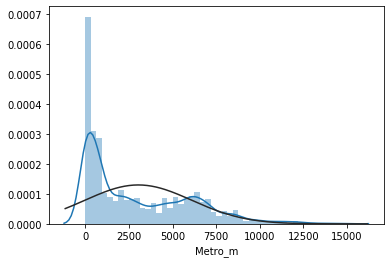

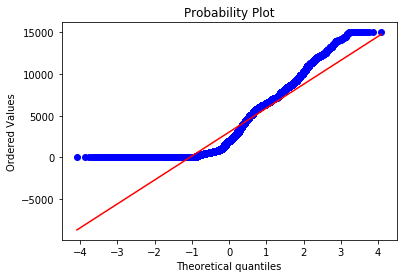

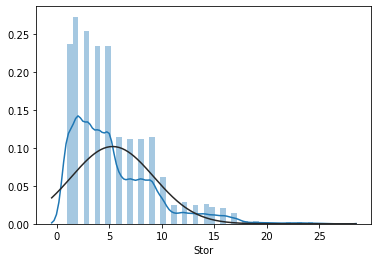

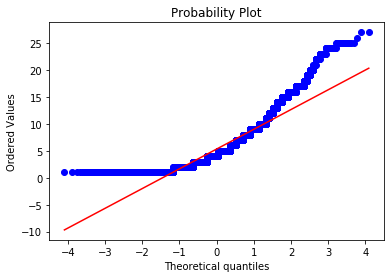

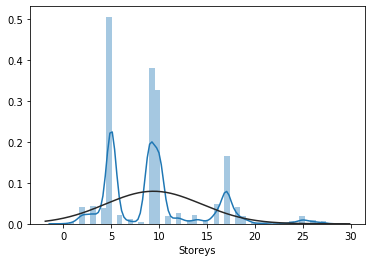

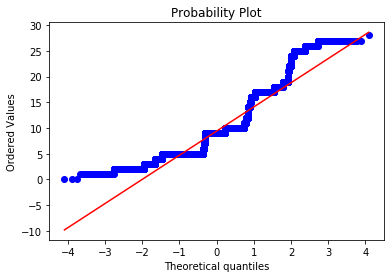

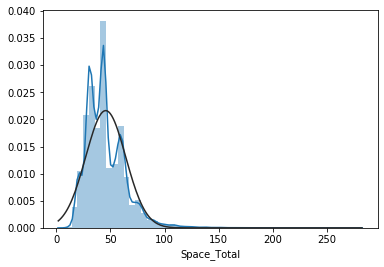

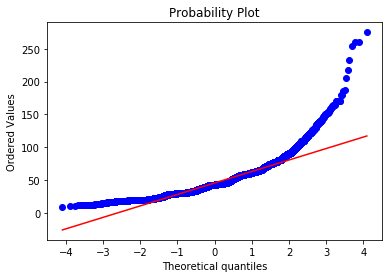

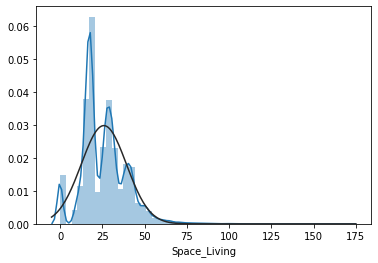

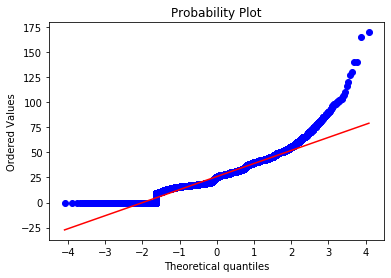

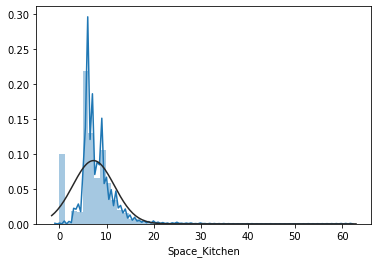

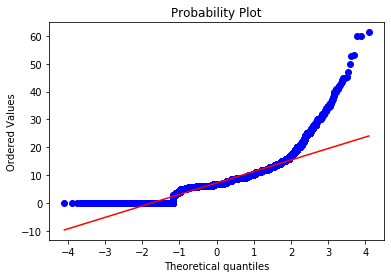

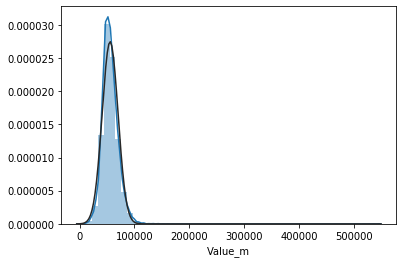

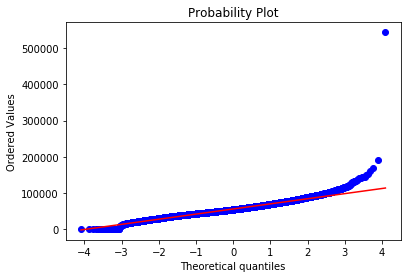

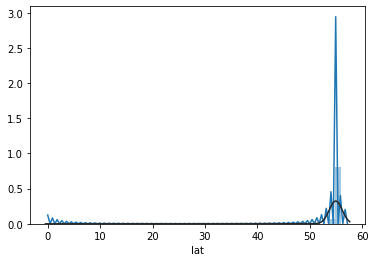

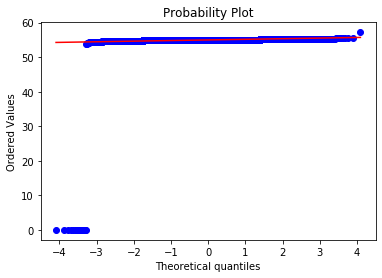

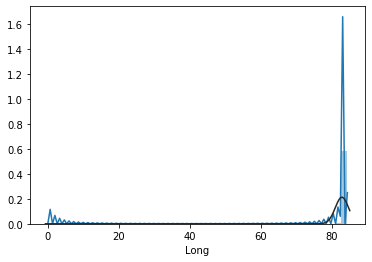

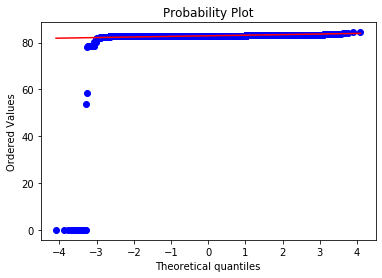

<Figure size 432x288 with 0 Axes>

In [60]:
# применяем функцию plot_hist()
plot_hist(data)

In [61]:
#  в зависимой переменной Value_m какие то нулевые значение(что ввроде бы не может быть) 
# и так же подозрительно резко  большие(до 544512.195 !!! )
# ХОТЕЛОСЬ БЫ ПРОЯСНИТЬ ЧТО ЭТО !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


In [62]:
# Для борьбы с выбросами, возможно хорошо было бы применить к перееменным Metro_m, Space_Total,Space_Living,Space_Kitchen,
# преобразование максимизирующее нормальность  или виндризацию

In [63]:
# функция, вычисляющая скос 
# после преобразований
def diagnostics_skewness(df, strategy):
    # создаем списки
    col_list = df.select_dtypes(include=['number']).columns
    skew_initial_list = []
    skew_pos_reciprocal_list = []
    skew_neg_reciprocal_list = []
    skew_log_list = []
    skew_corr_log_001_list = []
    skew_corr_log_01_list = []
    skew_corr_log_1_list = []
    skew_corr_log_5_list = []
    skew_cbrt_list = []
    skew_sqrt_list = []
    
    # создаем копию датафрейма
    df_ = df.copy()
    # запускаем цикл, который вычисляет скос по каждой 
    # преобразованной переменной
    for col in col_list:
        # импутируем пропуски в зависимости от заданной стратегии
        if strategy == 'median':
            df_[col] = df_[col].fillna(df_[col].median())
        if strategy == 'mean':
            df_[col] = df_[col].fillna(df_[col].mean())
        if strategy == 'zero':
            df_[col] = df_[col].fillna(0)
            
        skew_initial = df_[col].skew()
        skew_pos_reciprocal = (1 / (df_[col].clip(0.01))).skew()
        skew_neg_reciprocal = (-1 / (df_[col].clip(0.01))).skew()
        skew_log = np.log(df[col].clip(0.01)).skew()
        skew_corr_log_001 = np.log((df_[col].clip(0.01) / df_[col].mean()) + 0.001).skew()
        skew_corr_log_01 = np.log((df_[col].clip(0.01) / df_[col].mean()) + 0.01).skew()
        skew_corr_log_1 = np.log((df_[col].clip(0.01) / df_[col].mean()) + 0.1).skew()
        skew_corr_log_5 = np.log((df_[col].clip(0.01) / df_[col].mean()) + 0.5).skew()
        skew_cbrt = np.cbrt(df_[col].abs()).skew()
        skew_sqrt = np.sqrt(df_[col].abs()).skew()
        skew_initial_list.append(skew_initial)
        skew_pos_reciprocal_list.append(skew_pos_reciprocal)
        skew_neg_reciprocal_list.append(skew_neg_reciprocal)
        skew_log_list.append(skew_log)
        skew_corr_log_001_list.append(skew_corr_log_001)
        skew_corr_log_01_list.append(skew_corr_log_01)
        skew_corr_log_1_list.append(skew_corr_log_1)
        skew_corr_log_5_list.append(skew_corr_log_5)
        skew_cbrt_list.append(skew_cbrt)
        skew_sqrt_list.append(skew_sqrt)   

    result = pd.DataFrame({'Переменная': col_list,
                           'Skew_init': skew_initial_list,
                           'Skew_pos_recip': skew_pos_reciprocal_list,
                           'Skew_neg_recip': skew_neg_reciprocal_list,
                           'Skew_log': skew_log_list,
                           'Skew_adj_log (k=0.001)': skew_corr_log_001_list,
                           'Skew_adj_log (k=0.01)': skew_corr_log_01_list,
                           'Skew_adj_log (k=0.1)': skew_corr_log_1_list,
                           'Skew_adj_log (k=0.5)': skew_corr_log_5_list,
                           'Skew_cbrt': skew_cbrt_list,
                           'Skew_sqrt': skew_sqrt_list})
    result = np.round(result.sort_values(by='Skew_init', ascending=False), 3)
    cm = sns.light_palette('magenta', as_cmap=True)
    return(result.style.background_gradient(cmap=cm))

In [64]:
 # Задаем некоторые опции библиотеки pandas, которые настраивают вывод -
# увеличиваем количество выводимых столбцов
pd.set_option('display.max_columns', 10)
pd.set_option('display.float_format', lambda x: '%.3f' % x)  

# применяем нашу функцию
diagnostics_skewness(data, strategy='median')

,Переменная,Skew_init,Skew_pos_recip,Skew_neg_recip,Skew_log,Skew_adj_log (k=0.001),Skew_adj_log (k=0.01),Skew_adj_log (k=0.1),Skew_adj_log (k=0.5),Skew_cbrt,Skew_sqrt
11,Nonresidential,4.104000,-4.104000,4.104000,4.104000,4.104000,4.104000,4.104000,4.104000,4.104000,4.104000
12,WithoutKitchen,2.340000,-2.340000,2.340000,2.340000,2.340000,2.340000,2.340000,2.340000,2.340000,2.340000
7,Value_m,1.753000,30.307000,-30.307000,-21.330000,-8.681000,-4.190000,-1.244000,-0.269000,-1.392000,-0.227000
4,Space_Total,1.677000,1.122000,-1.122000,0.071000,0.072000,0.084000,0.188000,0.480000,0.501000,0.742000
6,Space_Kitchen,1.566000,2.340000,-2.340000,-2.215000,-2.194000,-2.088000,-1.674000,-0.910000,-1.732000,-1.061000
2,Stor,1.410000,1.465000,-1.465000,-0.236000,-0.234000,-0.213000,-0.043000,0.340000,0.282000,0.552000
3,Storeys,1.039000,102.161000,-102.161000,-0.462000,-0.417000,-0.321000,-0.103000,0.255000,0.185000,0.419000
1,Metro_m,0.912000,1.687000,-1.687000,-1.510000,-1.187000,-0.826000,-0.250000,0.168000,-0.412000,0.072000
5,Space_Living,0.879000,4.104000,-4.104000,-3.721000,-3.575000,-3.126000,-1.929000,-0.704000,-2.198000,-1.054000
0,Rooms_Number,0.738000,-0.018000,0.018000,0.265000,0.265000,0.268000,0.296000,0.387000,0.396000,0.471000


In [65]:
# Возможно в дальнейшем для некоторых переменных и некоторых моделей будет полезно 
# применить преобразования максимизирующее нормальность

In [66]:
data['geohash4'] = data.apply(lambda x: gh.encode(x['lat'],x['Long'], precision=4), axis = 1 )
data['geohash5'] = data.apply(lambda x: gh.encode(x['lat'],x['Long'], precision=5), axis = 1 )
data['geohash6'] = data.apply(lambda x: gh.encode(x['lat'],x['Long'], precision=6), axis = 1 )

In [67]:
# смотрим на типы переменных опять
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32249 entries, 0 to 34855
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rooms_Number    32249 non-null  int64  
 1   Object_Type     32249 non-null  object 
 2   Settlement      32249 non-null  object 
 3   District        32249 non-null  object 
 4   Street          32249 non-null  object 
 5   Metro           32249 non-null  object 
 6   Metro_m         32249 non-null  int64  
 7   Flats_Plan      32249 non-null  object 
 8   Stor            32249 non-null  int64  
 9   Storeys         32249 non-null  int64  
 10  Wall            32249 non-null  object 
 11  Space_Total     32212 non-null  float64
 12  Space_Living    32242 non-null  float64
 13  Space_Kitchen   32247 non-null  float64
 14  Value_m         32249 non-null  float64
 15  Balcon_Num      32249 non-null  int64  
 16  Sost            32249 non-null  object 
 17  Clozet          32249 non-null 

In [68]:
# выполняем дамми-кодирование 
# ТАК НЕЛЬЗЯ ВРОДЕ, ДО РАЗБИЕНИЯ, НО ПОТОМ РАЗБЕРУСЬ КАК СДЕЛАТЬ ПОСЛЕ РАЗБИЕНИЯ ЭТО !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#data = pd.get_dummies(data)

In [69]:
from category_encoders import TargetEncoder
from category_encoders import LeaveOneOutEncoder
from category_encoders import OrdinalEncoder

In [70]:
# создаем списки количественных
# и категориальных столбцов
cat_cols = data.dtypes[data.dtypes == 'object'].index
num_cols = data.dtypes[data.dtypes != 'object'].index

In [71]:
# use target encoding to encode two categorical features
encoder = OrdinalEncoder(cols=cat_cols)

In [72]:
data = encoder.fit_transform(data)
data

,Rooms_Number,Object_Type,Settlement,District,Street,...,Nonresidential,WithoutKitchen,geohash4,geohash5,geohash6
0,1,1,1,1,1,...,0,1,1,1,1
1,1,2,1,2,2,...,0,0,2,2,2
2,1,1,1,2,3,...,0,0,2,2,3
3,2,1,1,3,4,...,0,0,1,3,4
4,3,2,1,4,5,...,0,0,2,2,5
...,...,...,...,...,...,...,...,...,...,...,...
34851,2,2,1,4,13,...,0,0,1,8,91
34852,3,1,1,7,494,...,0,0,3,21,396
34853,3,1,1,7,358,...,0,0,3,21,371
34854,2,2,1,11,495,...,0,0,5,31,380


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32249 entries, 0 to 34855
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rooms_Number    32249 non-null  int64  
 1   Object_Type     32249 non-null  int32  
 2   Settlement      32249 non-null  int32  
 3   District        32249 non-null  int32  
 4   Street          32249 non-null  int32  
 5   Metro           32249 non-null  int32  
 6   Metro_m         32249 non-null  int64  
 7   Flats_Plan      32249 non-null  int32  
 8   Stor            32249 non-null  int64  
 9   Storeys         32249 non-null  int64  
 10  Wall            32249 non-null  int32  
 11  Space_Total     32212 non-null  float64
 12  Space_Living    32242 non-null  float64
 13  Space_Kitchen   32247 non-null  float64
 14  Value_m         32249 non-null  float64
 15  Balcon_Num      32249 non-null  int64  
 16  Sost            32249 non-null  int32  
 17  Clozet          32249 non-null 

In [75]:
# создаем обучающий массив признаков, тестовый массив признаков,
# обучающий массив меток, тестовый массив меток
train, test, y_train, y_test = train_test_split(data.drop('Value_m', axis=1), 
                                                data['Value_m'], 
                                                test_size=.3, 
                                                #stratify=data['Value_m'], 
                                                random_state=100)

# 1) Преобразования максимизирующие нормальность, обработка выбросов.


# 2) Обработка редк.категорий, котор.можно выполнить только после разбиения/внутри перекр.проверки.


# 3) Импутация пропусков, котор.можно выполнить только после разбиения/внутри перекр.проверки.


In [76]:
# проверяем наличие пропусков
print(data.isnull().sum())

Rooms_Number       0
Object_Type        0
Settlement         0
District           0
Street             0
Metro              0
Metro_m            0
Flats_Plan         0
Stor               0
Storeys            0
Wall               0
Space_Total       37
Space_Living       7
Space_Kitchen      2
Value_m            0
Balcon_Num         0
Sost               0
Clozet             0
lat                0
Long               0
Nonresidential     0
WithoutKitchen     0
geohash4           0
geohash5           0
geohash6           0
dtype: int64


In [77]:
# выполняем импутацию пропусков в переменной Space_Total, пробуем для начала средним
train['Space_Total'].fillna(train['Space_Total'].mean(), inplace=True)
test['Space_Total'].fillna(train['Space_Total'].mean(), inplace=True)

In [78]:
# выполняем импутацию пропусков в переменной Space_Living, пробуем для начала средним
train['Space_Living'].fillna(train['Space_Living'].mean(), inplace=True)
test['Space_Living'].fillna(train['Space_Living'].mean(), inplace=True)

In [79]:
# выполняем импутацию пропусков в переменной Space_Kitchen, пробуем для начала средним
train['Space_Kitchen'].fillna(train['Space_Kitchen'].mean(), inplace=True)
test['Space_Kitchen'].fillna(train['Space_Kitchen'].mean(), inplace=True)

# 4) Конструирование признаков, котор.можно выполнить только после разбиения/внутри перекр.проверки.


In [80]:
# создаем переменную AreaRatio
# отношением  жилой площади к общей.
a = 0.0001
train['AreaRatio'] = (train['Space_Living'] + a) / ( train['Space_Total']) + a
train['AreaRatio'].replace([np.inf, -np.inf], 0, inplace=True)

test['AreaRatio'] = (test['Space_Living'] + a) / ( test['Space_Total']) + a
test['AreaRatio'].replace([np.inf, -np.inf], 0, inplace=True)

# 5) Стандартизация, дамми-кодирование.

In [81]:
# смотрим на типы переменных опять
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22574 entries, 27348 to 6052
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rooms_Number    22574 non-null  int64  
 1   Object_Type     22574 non-null  int32  
 2   Settlement      22574 non-null  int32  
 3   District        22574 non-null  int32  
 4   Street          22574 non-null  int32  
 5   Metro           22574 non-null  int32  
 6   Metro_m         22574 non-null  int64  
 7   Flats_Plan      22574 non-null  int32  
 8   Stor            22574 non-null  int64  
 9   Storeys         22574 non-null  int64  
 10  Wall            22574 non-null  int32  
 11  Space_Total     22574 non-null  float64
 12  Space_Living    22574 non-null  float64
 13  Space_Kitchen   22574 non-null  float64
 14  Balcon_Num      22574 non-null  int64  
 15  Sost            22574 non-null  int32  
 16  Clozet          22574 non-null  int32  
 17  lat             22574 non-nu

In [82]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9675 entries, 9710 to 23003
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rooms_Number    9675 non-null   int64  
 1   Object_Type     9675 non-null   int32  
 2   Settlement      9675 non-null   int32  
 3   District        9675 non-null   int32  
 4   Street          9675 non-null   int32  
 5   Metro           9675 non-null   int32  
 6   Metro_m         9675 non-null   int64  
 7   Flats_Plan      9675 non-null   int32  
 8   Stor            9675 non-null   int64  
 9   Storeys         9675 non-null   int64  
 10  Wall            9675 non-null   int32  
 11  Space_Total     9675 non-null   float64
 12  Space_Living    9675 non-null   float64
 13  Space_Kitchen   9675 non-null   float64
 14  Balcon_Num      9675 non-null   int64  
 15  Sost            9675 non-null   int32  
 16  Clozet          9675 non-null   int32  
 17  lat             9675 non-null

In [83]:
scaler = StandardScaler()

In [84]:
num_cols = [col for col in train.columns if train[col].dtype.name != 'object']

scaler.fit(train[num_cols])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [85]:
train[num_cols] = scaler.transform(train[num_cols])
test[num_cols] = scaler.transform(test[num_cols])

In [86]:
'''
# выполняем дамми-кодирование
#train = pd.get_dummies(train)
#test = pd.get_dummies(test)
# импортируем класс OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# создаем экземпляр класса OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
'''

"\n# выполняем дамми-кодирование\n#train = pd.get_dummies(train)\n#test = pd.get_dummies(test)\n# импортируем класс OneHotEncoder\nfrom sklearn.preprocessing import OneHotEncoder\n\n# создаем экземпляр класса OneHotEncoder\nohe = OneHotEncoder(sparse=False, handle_unknown='ignore')\n"

In [87]:
'''
# обучаем модель дамми-кодирования - определяем дамми для переменной
# pay в обучающем массиве признаков
ohe.fit(train[num_cols])

# выполняем дамми-кодирование переменной
# pay в обучающем массиве признаков
ohe_train_transformed = ohe.transform(train[num_cols])
# смотрим первые 10 наблюдений
ohe_train_transformed[:10]
'''

'\n# обучаем модель дамми-кодирования - определяем дамми для переменной\n# pay в обучающем массиве признаков\nohe.fit(train[num_cols])\n\n# выполняем дамми-кодирование переменной\n# pay в обучающем массиве признаков\nohe_train_transformed = ohe.transform(train[num_cols])\n# смотрим первые 10 наблюдений\nohe_train_transformed[:10]\n'

# Нужно разобраться с работой с координатами
это отдельная тема.
Нужно понять как лучше их преобразовать(геохеш, ...) 
и что и как из них выжать .

In [88]:
# а пока что на данном этапе, пока мы не разобрались с работой с ними, удалим их из набора данных :
data.drop(['lat','Long'],axis=1, inplace=True)
data.columns

Index(['Rooms_Number', 'Object_Type', 'Settlement', 'District', 'Street',
       'Metro', 'Metro_m', 'Flats_Plan', 'Stor', 'Storeys', 'Wall',
       'Space_Total', 'Space_Living', 'Space_Kitchen', 'Value_m', 'Balcon_Num',
       'Sost', 'Clozet', 'Nonresidential', 'WithoutKitchen', 'geohash4',
       'geohash5', 'geohash6'],
      dtype='object')

In [89]:
# Пока что попробуем моделирование так,
# а потом будем постепенно улучшать все:

In [90]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(lr.score(train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(lr.score(test, y_test)))

R-квадрат на обучающем наборе: 0.33
R-квадрат на тестовом наборе: 0.35


In [91]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(ridge.score(train, y_train)))
print("R-квадрат на тестовом наборе: {:.3f}".format(ridge.score(test, y_test)))

R-квадрат на обучающем наборе: 0.33
R-квадрат на тестовом наборе: 0.345


In [92]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(train, y_train)
tree.fit(train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(test, y_test)))

Правильность на обучающем наборе: 0.999
Правильность на тестовом наборе: 0.415


In [93]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100).fit(train, y_train)

R2 = rf.score(test, y_test)
print("R-квадрат на обучающем наборе: {:.2f}".format(rf.score(train, y_train)))
print("R-квадрат на тестовом наборе: {:.3f}".format(R2))

R-квадрат на обучающем наборе: 0.95
R-квадрат на тестовом наборе: 0.693


In [94]:
RMSE = np.sqrt(mean_squared_error(y_train, rf.predict(train)))
RMSE_test = np.sqrt(mean_squared_error(y_test, rf.predict(test)))  

print('RMSE на обучающей выборке:', RMSE)
print('RMSE на тестовой выборке:', RMSE_test)

RMSE на обучающей выборке: 3314.5802814208664
RMSE на тестовой выборке: 8038.267447981729


In [95]:
data.head()

,Rooms_Number,Object_Type,Settlement,District,Street,...,Nonresidential,WithoutKitchen,geohash4,geohash5,geohash6
0,1,1,1,1,1,...,0,1,1,1,1
1,1,2,1,2,2,...,0,0,2,2,2
2,1,1,1,2,3,...,0,0,2,2,3
3,2,1,1,3,4,...,0,0,1,3,4
4,3,2,1,4,5,...,0,0,2,2,5
